In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

# Warning Suppression
import warnings  # For managing or ignoring warnings during code execution
warnings.filterwarnings('ignore')  # Suppresses warnings for cleaner outputs

print("All packages are imported")

All packages are imported


### Load and Display the Dataset

In [2]:
data = pd.read_csv('machine_failure_data.csv')

In [3]:
data.head(10)

Machine_ID  Usage_Hours  Failures
0   Machine_1          910         0
1   Machine_2         3822         1
2   Machine_3         3142         1
3   Machine_4          516         0
4   Machine_5         4476         1
5   Machine_6         3494         0
6   Machine_7         3221         1
7   Machine_8         2969         0
8   Machine_9          180         1
9  Machine_10         1735         0

### Data Exploration and Visualization

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Machine_ID   1000 non-null   object
 1   Usage_Hours  1000 non-null   int64 
 2   Failures     1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB


In [5]:
# Summary statistics to Summarize numerical columns.
data.describe()

Usage_Hours     Failures
count  1000.000000  1000.000000
mean   2578.250000     0.523000
std    1390.960625     0.499721
min      53.000000     0.000000
25%    1389.500000     0.000000
50%    2647.000000     1.000000
75%    3693.250000     1.000000
max    4998.000000     1.000000

### Check for Missing data

In [6]:
# Check for missing values
data.isnull().sum()

Machine_ID     0
Usage_Hours    0
Failures       0
dtype: int64

this mean there is no missing data

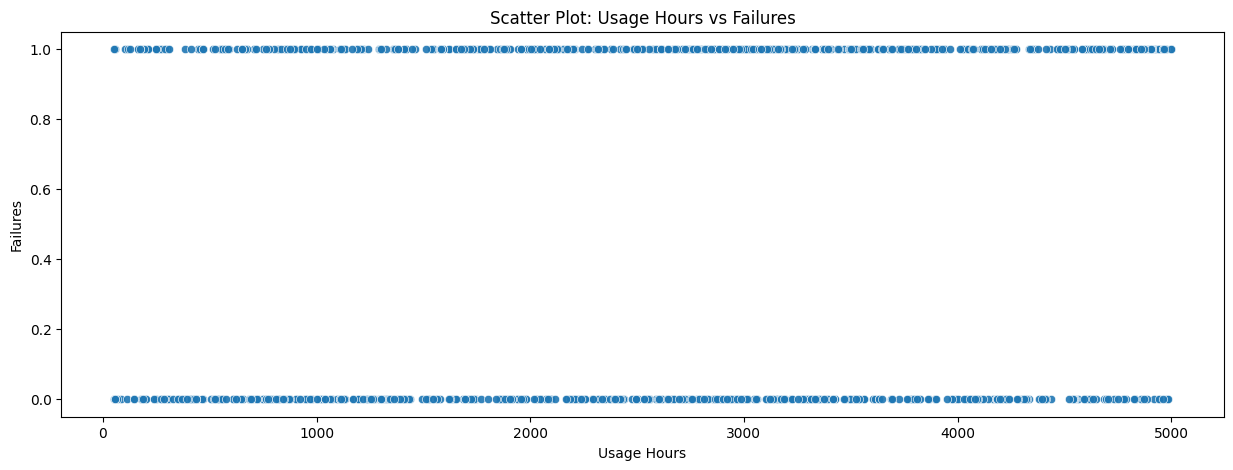

In [8]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='Usage_Hours', y='Failures', data=data, alpha=0.9)
plt.title('Scatter Plot: Usage Hours vs Failures')
plt.xlabel('Usage Hours')
plt.ylabel('Failures')
plt.show()

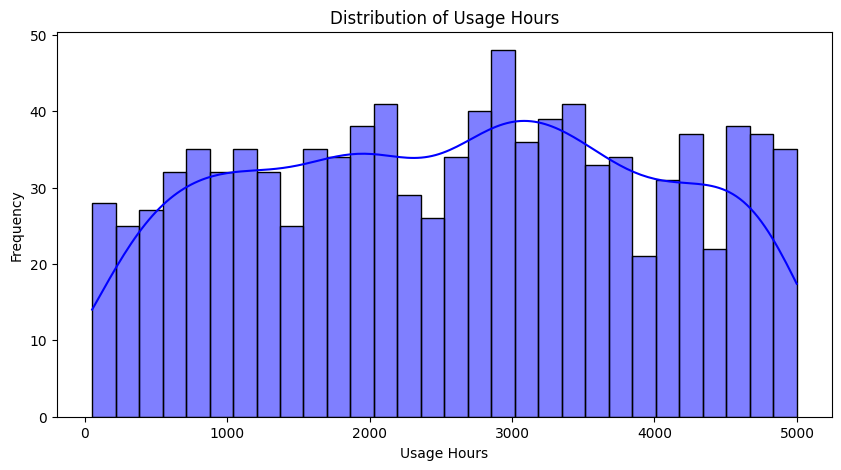

In [10]:
# Histogram of Usage Hours to Visualize the distribution of usage hours.
plt.figure(figsize=(10, 5))
sns.histplot(data['Usage_Hours'], kde=True, bins=30, color='blue')
plt.title('Distribution of Usage Hours')
plt.xlabel('Usage Hours')
plt.ylabel('Frequency')
plt.show()

### Prior Probability of Failure

In [11]:
# Calculate prior probability
prior_failure = data['Failures'].mean()
print(f"Prior Probability of Failure: {prior_failure:.4f}")

Prior Probability of Failure: 0.5230


### Likelihood of Failure

#### P(Usage Hours | Failure)

   Usage_Hours  Likelihood
0           53         1.0
1           54         0.0
2           55         1.0
3           59         0.0
4           66         0.0


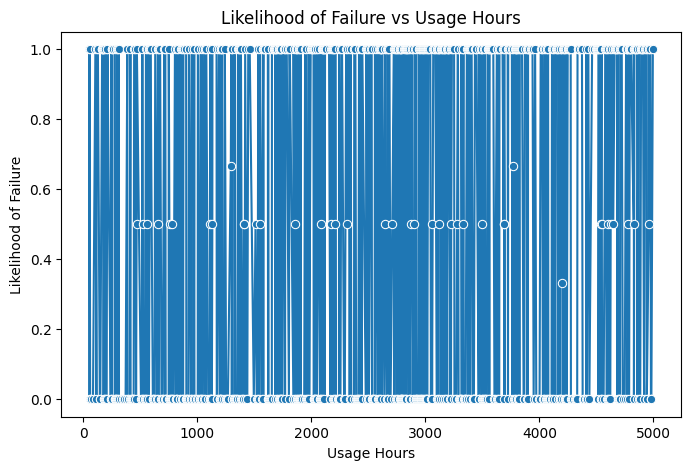

In [13]:
# Calculate likelihood
likelihood = data.groupby('Usage_Hours')['Failures'].mean().reset_index()
likelihood.columns = ['Usage_Hours', 'Likelihood']
print(likelihood.head())

# Plot likelihood vs usage hours
plt.figure(figsize=(8, 5))
sns.lineplot(x='Usage_Hours', y='Likelihood', data=likelihood, marker='o')
plt.title('Likelihood of Failure vs Usage Hours')
plt.xlabel('Usage Hours')
plt.ylabel('Likelihood of Failure')
plt.show()

### Posterior Probability Using Bayes' Theorem

#### Bayes' Theorem:
##### P(Failure | Usage Hours)= P(Usage Hours)*P(Usage Hours | Failure)⋅P(Failure)


In [15]:
# Calculate posterior probability
usage_prob = data['Usage_Hours'].value_counts(normalize=True).reset_index()
usage_prob.columns = ['Usage_Hours', 'P(Usage_Hours)']

# Merge data to calculate posterior probability
posterior = pd.merge(likelihood, usage_prob, on='Usage_Hours')
posterior['Posterior'] = (posterior['Likelihood'] * prior_failure) / posterior['P(Usage_Hours)']

print(posterior.head())

   Usage_Hours  Likelihood  P(Usage_Hours)  Posterior
0           53         1.0           0.001      523.0
1           54         0.0           0.001        0.0
2           55         1.0           0.001      523.0
3           59         0.0           0.002        0.0
4           66         0.0           0.001        0.0


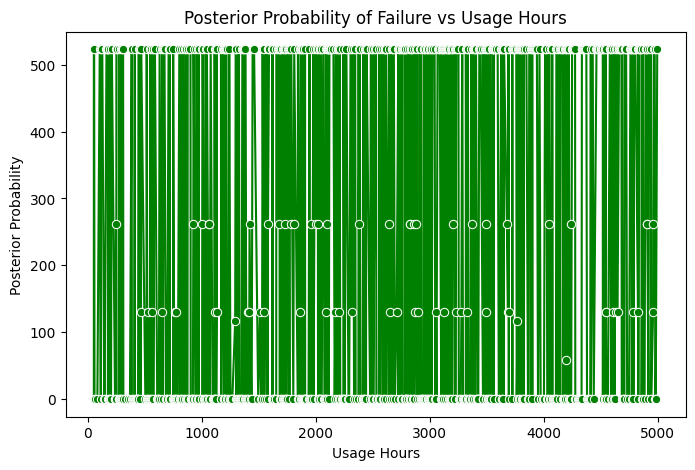

In [16]:
# Plot posterior probabilities
plt.figure(figsize=(8, 5))
sns.lineplot(x='Usage_Hours', y='Posterior', data=posterior, marker='o', color='green')
plt.title('Posterior Probability of Failure vs Usage Hours')
plt.xlabel('Usage Hours')
plt.ylabel('Posterior Probability')
plt.show()

### Prediction for New Machines

In [17]:
# Predict failure for a machine with 1000 usage hours
usage_hours = 1000
prediction = posterior[posterior['Usage_Hours'] == usage_hours]['Posterior']
if not prediction.empty:
    print(f"Predicted Probability of Failure at {usage_hours} usage hours: {prediction.values[0]:.4f}")
else:
    print(f"No data available for {usage_hours} usage hours.")

Predicted Probability of Failure at 1000 usage hours: 0.0000


### Model Evaluation

In [19]:
# Merge posterior with original data for evaluation
data_eval = pd.merge(data, posterior[['Usage_Hours', 'Posterior']], on='Usage_Hours', how='left')

# Calculate Mean Squared Error
mse = mean_squared_error(df_eval['Failures'], data_eval['Posterior'])
print(f"Mean Squared Error (MSE): {mse:.4f}")# it was easy for you to adjust the elements.

NameError: name 'df_eval' is not defined

### Interpretation of Results

##### Bayesian Inference can assist in maintenance scheduling by predicting failure risk.
##### Machines are more likely to fail as usage hours increase.
##### Future improvements could include incorporating additional variables (e.g., machine type, environment)